<a href="https://colab.research.google.com/github/borjamm/Red_convolutiva/blob/master/Red_convolutiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

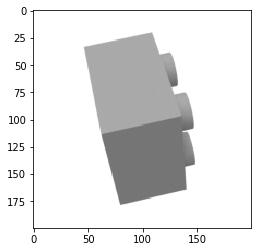

In [4]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/LEGO brick images/train/2357 Brick corner 1x2x2/201706171206-0187.png', 'r')
imshow(np.asarray(pil_im))

Comenzamos a crear nuestra red convolutiva. Para ello, especificamos los directorios donde se almacenan las imágenes a clasificar y las configuramos para la red.



In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 100

train_data_dir = '/content/drive/My Drive/Colab Notebooks/LEGO brick images/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/LEGO brick images/valid'

train_datagen = ImageDataGenerator( 
        rescale=1./255, 
        shear_range=0.2,
        zoom_range=0.2, 
        horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory( 
        train_data_dir,
        target_size=(150, 150), 
        batch_size=100, 
        class_mode='categorical') 

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 3296 images belonging to 16 classes.
Found 3296 images belonging to 16 classes.


Es hora de definir el modelo que va a seguir nuestra red convolutiva. Para ello especificamos el números de capas que va a tener, el kernel en cada capa, las funciones de activación, los hiperparámetros, etc.

In [0]:
# MODEL --------------------------------------------------

model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.40)) 
model.add(Flatten()) 
model.add(Dense(128)) 

model.add(Dropout(0.50)) 
model.add(Dense(16, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Ya casi está todo listo, sólo falta que el modelo comience a entrenar y a validar el conjunto de muestras.

In [16]:
# TRAINING --------------------------------------------------
epochs = 10

model.fit_generator( 
        train_generator,
        steps_per_epoch=330,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=330,
)

Epoch 1/10
330/330 [==============================] - 289s 874ms/step - loss: 1.2389 - acc: 0.5848 - val_loss: 0.7839 - val_acc: 0.7145
Epoch 2/10
330/330 [==============================] - 283s 856ms/step - loss: 0.7442 - acc: 0.7477 - val_loss: 0.6233 - val_acc: 0.7934
Epoch 3/10
330/330 [==============================] - 282s 854ms/step - loss: 0.4761 - acc: 0.8418 - val_loss: 0.5162 - val_acc: 0.8383
Epoch 4/10
330/330 [==============================] - 285s 863ms/step - loss: 0.3299 - acc: 0.8924 - val_loss: 0.5291 - val_acc: 0.8565
Epoch 5/10
330/330 [==============================] - 284s 861ms/step - loss: 0.2415 - acc: 0.9214 - val_loss: 0.5620 - val_acc: 0.8632
Epoch 6/10
330/330 [==============================] - 285s 864ms/step - loss: 0.1824 - acc: 0.9396 - val_loss: 0.6056 - val_acc: 0.8532
Epoch 7/10
330/330 [==============================] - 282s 854ms/step - loss: 0.1510 - acc: 0.9499 - val_loss: 0.5715 - val_acc: 0.8805
Epoch 8/10
330/330 [============================